In [1]:
import matplotlib.pyplot as plt
import numpy as np

from glob import glob

from oscar import OSCAR 

%matplotlib inline

<div class="alert alert-info"><h1>Exercise 1: What about RCPs in more complex ESMs?  </h1></div>

1. Look at the files in the directory `CMIP5`. These files contain the date, the average SST and the SST anomaly referenced to year 2006 for a suite of ESMs and for various scenarios. Note that in CMIP5 scenarios start in 2006.  Open one of the files and see how it is structured.

2. One model: choose one of the CMIP5 models for which the 4 RCPs are available. Plot the SST for the 4 scenarios in this model. Are the results consistent with what your know from these 4 scenarios?

To avoid writing down all files present in the CMIP5 directory, you should use a for loop that reads and open each "rcp85" file, then each "rcp60" file etc. Execute the 3 following commands and find a way to make such a loop using the "glob" library.  Try printing out the results of the following calls (these will return lists of filenames which you can iterate over):
     
     from glob import glob
     
     print(glob("../DATA/CMIP5/*.dat"))
     print(glob("../DATA/CMIP5/*IPSL*p1.dat"))

(2006, 2100)

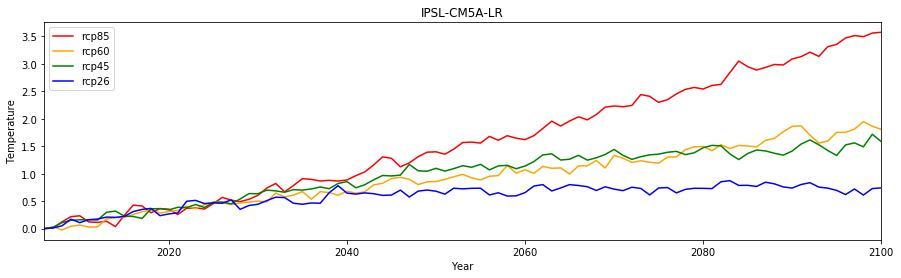

In [2]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 4)

experiments = ['rcp85', 'rcp60', 'rcp45', 'rcp26']
colors = ['red', 'orange', 'green', 'blue']
model = 'IPSL-CM5A-LR'

for color, experiment in zip(colors, experiments):
    for filename in glob('CMIP5/*{}*{}_r1i1p1.dat'.format(experiment, model)):
        data = np.loadtxt(filename)
        yeardata = data[:, 0]
        dsst = data[:, 2]
        ax.plot(yeardata, dsst , color=color, label=experiment)
        
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.set_title(model)
ax.set_xlim([2006, 2100])

<ol start="3">
<li>One model ensemble: for the IPSL-CM5A-LR model, there are several realisations of the same scenarios. We call this a model ensemble. Plot all realizations of all scenarios for the IPSL model. Why do you think the same model can have different solutions for the same scenarios? Why do you think we perform such ensembles with our ESMs?</li>
</ol>

(2006, 2100)

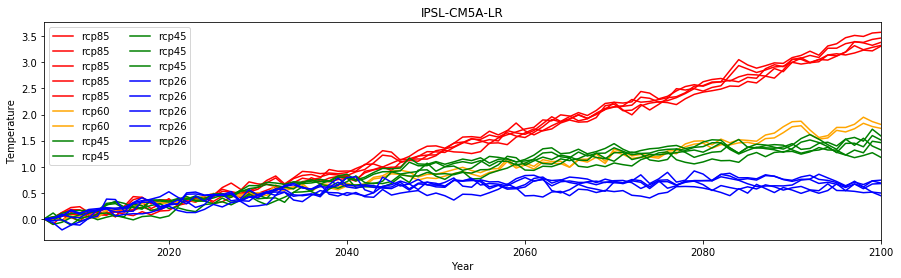

In [3]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 4)

model = 'IPSL-CM5A-LR'

for color, experiment in zip(colors, experiments):
    for filename in glob('CMIP5/*{}*{}*.dat'.format(experiment, model)):
        data = np.loadtxt(filename)
        yeardata = data[:, 0]
        dsst = data[:, 2]
        ax.plot(yeardata, dsst , color=color, label=experiment)
        
ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.set_title(model)
ax.set_xlim([2006, 2100])

<ol start="4">
<li>Multi-model ensemble: Plot the sea surface temperature obtained with all the available CMIP5 models for all scenarios on the sameplot (use 4 colors, one for each of the 4 scenarios). Plot the SST for each individual CMIP5 models and also the mean of all the models for each scenario (i.e. multi-model mean).</li>
<li>Discuss the differences between scenarios and models. Are the results consistent with what you know from these 4 scenarios? Is the warming associated with RCP2.6 systematically lower than the warming obtained with the other scenarios? Why do you think that is?</li>
</ol>

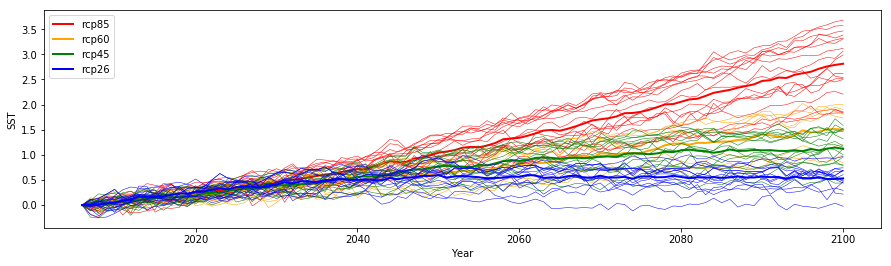

In [4]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 4)

for color, experiment in zip(colors, experiments):
    mean = 0
    count = 0
    for filename in glob('CMIP5/*{}*.dat'.format(experiment)):
        data = np.loadtxt(filename)
        yeardata = data[:, 0]
        sst = data[:, 1]
        dsst = data[:, 2]
        ax.plot(yeardata, dsst, color=color, linewidth=0.5)
        mean = mean + dsst 
        count = count + 1 
    ax.plot(yeardata, mean / count , color=color, label=experiment, linewidth=2)
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('SST')    

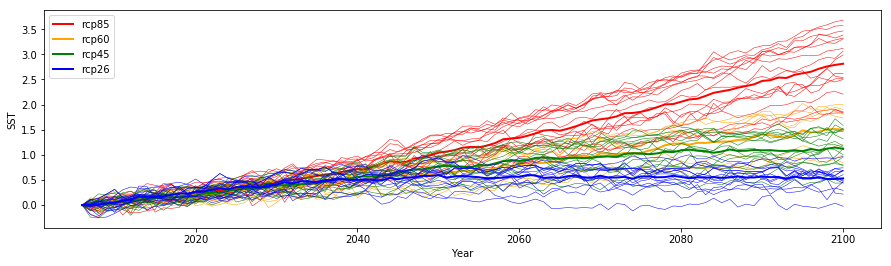

In [5]:
# Alternative solution -- construct a 2D array of dsst; then take the mean along the 
# appropriate axis.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 4)

for color, experiment in zip(colors, experiments):
    dssts = []
    
    for filename in glob('CMIP5/*{}*.dat'.format(experiment)):
        data = np.loadtxt(filename)
        yeardata = data[:, 0]
        sst = data[:, 1]
        dsst = data[:, 2]
        dssts.append(dsst)
        ax.plot(yeardata, dsst, color=color, linewidth=0.5)
        
    mean = np.array(dssts).mean(axis=0)
    ax.plot(yeardata, mean, color=color, label=experiment, linewidth=2)
    
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('SST')    

<ol start="6">
<li> Run the four RCP scenarios with OSCAR and plot the SST anomaly referenced to year 2006 (i.e. the anomaly should be 0 in 2006 to compare to the CMIP5 ESMs).</li>
</ol>

In [6]:
enddate = 2100
r8 = OSCAR(scen_ALL='RCP8.5').run(enddate)
r6 = OSCAR(scen_ALL='RCP6.0').run(enddate)
r4 = OSCAR(scen_ALL='RCP4.5').run(enddate)
r2 = OSCAR(scen_ALL='RCP2.6').run(enddate)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


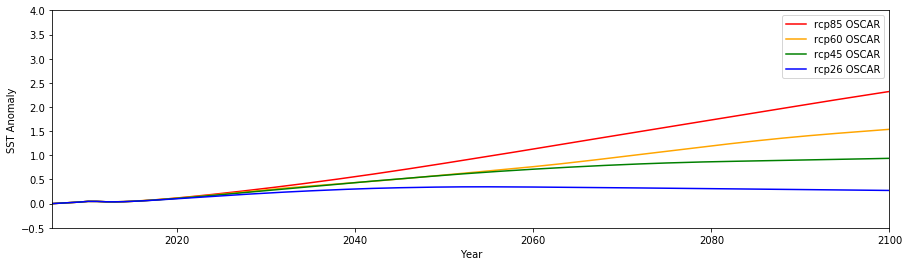

In [7]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 4)

year = np.arange(len(r8['D_sst'])) + 1700

ax.plot(year, r8['D_sst'] - r8['D_sst'][306], color=colors[0], label=experiments[0]+' OSCAR')
ax.plot(year, r6['D_sst'] - r6['D_sst'][306], color=colors[1], label=experiments[1]+' OSCAR')
ax.plot(year, r4['D_sst'] - r4['D_sst'][306], color=colors[2], label=experiments[2]+' OSCAR')
ax.plot(year, r2['D_sst'] - r2['D_sst'][306], color=colors[3], label=experiments[3]+' OSCAR')

ax.legend()
ax.set_xlim([2006, 2100])
ax.set_ylim([-0.5, 4])

ax.set_xlabel('Year')
ax.set_ylabel('SST Anomaly')

<ol start="7">
<li> Plot the SST anomaly similarly to question 5 along with the CMIP5 results (use the for loop). What are similarities and differences between OSCAR, CMIP5 individual models and the multi-model mean of each scenario. Are you surprised that OSCAR manage to capture the beahavior of much more complex models that need months to run on a super computer? Discuss the strengths and limitations of ESMs and OSCAR.</li>
</ol>

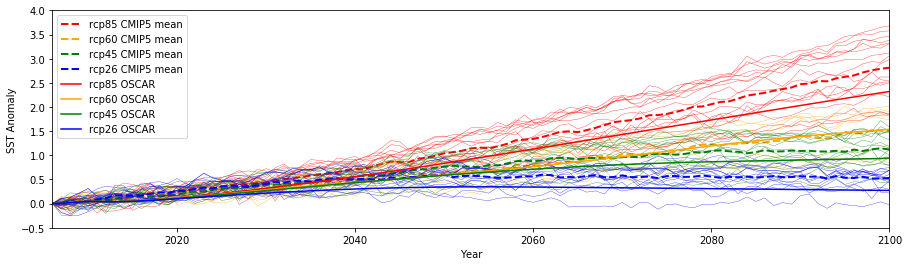

In [8]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 4)

for color, experiment in zip(colors, experiments):
    dssts = []
    for filename in glob('CMIP5/*{}*.dat'.format(experiment)):
        data = np.loadtxt(filename)
        yeardata = data[:, 0]
        sst = data[:, 1]
        dsst = data[:, 2]
        dssts.append(dsst)
        ax.plot(yeardata, dsst , color=color, linewidth=0.3)
    
    mean = np.array(dssts).mean(axis=0)
    ax.plot(yeardata, mean , color=color,
            label='{} CMIP5 mean'.format(experiment), linewidth=2, linestyle='--')

year = np.arange(len(r8['D_sst'])) + 1700

ax.plot(year, r8['D_sst'] - r8['D_sst'][306], color=colors[0], label=experiments[0]+' OSCAR')
ax.plot(year, r6['D_sst'] - r6['D_sst'][306], color=colors[1], label=experiments[1]+' OSCAR')
ax.plot(year, r4['D_sst'] - r4['D_sst'][306], color=colors[2], label=experiments[2]+' OSCAR')
ax.plot(year, r2['D_sst'] - r2['D_sst'][306], color=colors[3], label=experiments[3]+' OSCAR')

ax.legend()
ax.set_xlim([2006, 2100])
ax.set_ylim([-0.5, 4])

ax.set_xlabel('Year')
ax.set_ylabel('SST Anomaly')

<div class="alert alert-info"><h1>Exercise 2: Carbon-climate feedbacks</h1></div>

1. Run RCP8.5 and no climate feedback until 2200 and plot surface temperature in both cases. What is the temperature difference in 2100? in 2200? 
2. Explain the temperature difference between the 2 experiments and prove your point with figure(s). Why is the temperature difference so small in 2100?

In [9]:
enddate = 2200
control = OSCAR().run(enddate)
r8 = OSCAR(scen_ALL='RCP8.5').run(enddate)
r8noFdbk = OSCAR(scen_ALL='RCP8.5', fT=0).run(enddate)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


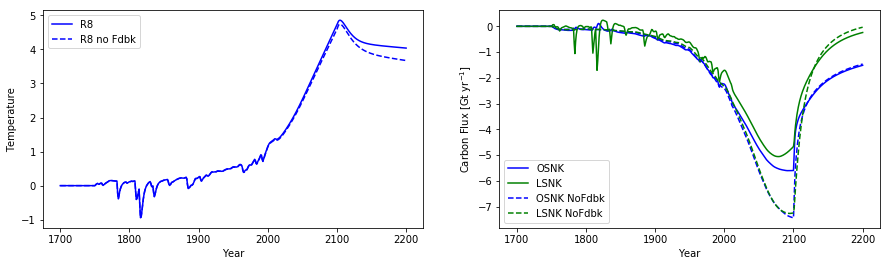

In [10]:
year = np.arange(len(r8['D_gst'])) + 1700

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 4)

ax1.plot(year, r8['D_gst'], label='R8', color='blue')
ax1.plot(year, r8noFdbk['D_gst'], label='R8 no Fdbk', color='blue', linestyle='--')
ax1.legend()
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature')

ax2.plot(year, r8['OSNK'], label='OSNK', color='blue')
ax2.plot(year, r8['LSNK'], label='LSNK', color='green')
ax2.plot(year, r8noFdbk['OSNK'], label='OSNK NoFdbk', color='blue', linestyle='--')
ax2.plot(year, r8noFdbk['LSNK'], label='LSNK NoFdbk', color='green', linestyle='--')

ax2.legend()
ax2.set_xlabel('Year')
ax2.set_ylabel('Carbon Flux [Gt yr$^{-1}$]')